# Project 1
Myli Brown and Ethan Stout

### Importing Libraries

In [1]:
#Import in necessary libraries.
import itertools
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from pathlib import Path
from sklearn.base import clone
from sklearn.decomposition import PCA
from sklearn.exceptions import ConvergenceWarning
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import SGDClassifier, LogisticRegression, Perceptron as Perceptron_sklearn
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression

### Data Cleaning and Preprocessing

In [4]:
# Load the dataset modified from the code we were given in class.
file_path = 'project_adult.csv'


try:
    adult_df = pd.read_csv(file_path, header=None, encoding='utf-8')
    print(f"Successfully loaded '{file_path}'. First 5 rows:")
    print(adult_df.head())
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except pd.errors.EmptyDataError:
    print(f"Error: The file '{file_path}' is empty or contains no data.")
except pd.errors.ParserError as e:
    print(f"Error: A parsing error occurred while reading '{file_path}': {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

file_path_2 = 'project_validation_inputs.csv'
try:
    validation_df = pd.read_csv(file_path_2, header=None, encoding='utf-8')
    print(f"Successfully loaded '{file_path_2}'. First 5 rows:")
    print(validation_df.head())
except FileNotFoundError:
    print(f"Error: The file '{file_path_2}' was not found.")
except pd.errors.EmptyDataError:
    print(f"Error: The file '{file_path_2}' is empty or contains no data.")
except pd.errors.ParserError as e:
    print(f"Error: A parsing error occurred while reading '{file_path_2}': {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Successfully loaded 'project_adult.csv'. First 5 rows:
        0    1                 2       3          4              5   \
0      NaN  age         workclass  fnlwgt  education  education-num   
1   5514.0   33         Local-gov  198183  Bachelors             13   
2  19777.0   36           Private   86459  Assoc-voc             11   
3  10781.0   58  Self-emp-not-inc  203039        9th              5   
4  32240.0   21           Private  180190  Assoc-voc             11   

                   6                7              8      9       10  \
0      marital-status       occupation   relationship   race     sex   
1       Never-married   Prof-specialty  Not-in-family  White  Female   
2  Married-civ-spouse  Exec-managerial        Husband  White    Male   
3           Separated     Craft-repair  Not-in-family  White    Male   
4  Married-civ-spouse  Farming-fishing        Husband  White    Male   

             11            12              13              14      15  
0  capital-ga

In [5]:
# Drop the first column which was an index.
adult_df = adult_df.drop(adult_df.columns[0], axis=1)
adult_df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1,33,Local-gov,198183,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,>50K
2,36,Private,86459,Assoc-voc,11,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1887,50,United-States,>50K
3,58,Self-emp-not-inc,203039,9th,5,Separated,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,21,Private,180190,Assoc-voc,11,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,46,United-States,<=50K


In [ ]:
# Drop the first column which was an index.
validation_df = validation_df.drop(validation_df.columns[0], axis=1)
validation_df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
1,27,Private,160178,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,38,United-States
2,45,State-gov,50567,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States
3,29,Private,185908,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,55,United-States
4,30,Private,190040,Bachelors,13,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States


In [ ]:
# Set first row as header for adult_df
adult_df.columns = adult_df.iloc[0]
adult_df = adult_df[1:]
adult_df.reset_index(drop=True, inplace=True) 
adult_df.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,33,Local-gov,198183,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,>50K
1,36,Private,86459,Assoc-voc,11,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1887,50,United-States,>50K
2,58,Self-emp-not-inc,203039,9th,5,Separated,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,21,Private,180190,Assoc-voc,11,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,46,United-States,<=50K
4,27,Private,279872,Some-college,10,Divorced,Other-service,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [ ]:
# Set first row as column headers for validation_df
validation_df.columns = validation_df.iloc[0]
validation_df = validation_df[1:]
validation_df.reset_index(drop=True, inplace=True)
validation_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,27,Private,160178,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,38,United-States
1,45,State-gov,50567,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States
2,29,Private,185908,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,55,United-States
3,30,Private,190040,Bachelors,13,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States
4,29,Self-emp-not-inc,189346,Some-college,10,Divorced,Craft-repair,Not-in-family,White,Male,2202,0,50,United-States


In [ ]:
# Handle missing values.
print("length of adult_df before removing NAs: ", len(adult_df), " length of validation_df before removing NAs: ", len(validation_df))
adult_df = adult_df.replace('?', np.nan) # All of the NA values are represented by '?' in the datasets
adult_df = adult_df.dropna()

validation_df = validation_df.replace('?', np.nan)
validation_df = validation_df.dropna()

# Checking to see how many rows were removed.
print("length of adult_df after removing NAs: ", len(adult_df), " length of validation_df after removing NAs: ", len(validation_df))

length of adult_df before removing NAs:  26048  length of validation_df before removing NAs:  6513
length of adult_df after removing NAs:  24157  length of validation_df after removing NAs:  6005


In [ ]:
# Bin the target variable
adult_df['income'] = adult_df['income'].apply(lambda x: 1 if x == '>50K' else 0)
adult_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,33,Local-gov,198183,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,1
1,36,Private,86459,Assoc-voc,11,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1887,50,United-States,1
2,58,Self-emp-not-inc,203039,9th,5,Separated,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,0
3,21,Private,180190,Assoc-voc,11,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,46,United-States,0
4,27,Private,279872,Some-college,10,Divorced,Other-service,Not-in-family,White,Male,0,0,40,United-States,0


In [ ]:
# One hot encode the categorical features.
categorical_columns = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country"]
adult_df = pd.get_dummies(adult_df, columns=categorical_columns)
validation_df = pd.get_dummies(validation_df, columns=categorical_columns)

In [ ]:
# Making sure the data is one hot encoded correctly.
adult_df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,33,198183,13,0,0,50,1,False,True,False,...,False,False,False,False,False,False,False,True,False,False
1,36,86459,11,0,1887,50,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,58,203039,5,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,21,180190,11,0,0,46,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
4,27,279872,10,0,0,40,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
# make sure both dataframes have the same number of columns after get_dummies
validation_df = validation_df.reindex(columns=adult_df.columns, fill_value=0)
validation_df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,27,160178,10,0,0,38,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,45,50567,9,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,29,185908,13,0,0,55,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,30,190040,13,0,0,40,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
4,29,189346,10,2202,0,50,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
# Convert boolean dummy columns to integers (0/1) for both adult_df and validation_df
adult_df = adult_df.astype({col: int for col in adult_df.columns if adult_df[col].dtype == 'bool'})
validation_df = validation_df.astype({col: int for col in validation_df.columns if validation_df[col].dtype == 'bool'})
adult_df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,33,198183,13,0,0,50,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,36,86459,11,0,1887,50,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,58,203039,5,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,21,180190,11,0,0,46,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,27,279872,10,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Separate features and target
X = adult_df.drop(columns=['income'])
y = adult_df['income']

In [ ]:
# Standardize the data (z-score)
from sklearn.preprocessing import StandardScaler
numeric_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
scaler = StandardScaler()
    
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

validation_df[numeric_cols] = scaler.transform(validation_df[numeric_cols])

In [ ]:
# Make sure that the data is standardized and all of the columns are numeric.
X.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,-0.413348,0.079327,1.128346,-0.147456,-0.219980,0.763915,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,-0.185241,-0.981089,0.344207,-0.147456,4.442817,0.763915,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,1.487546,0.125418,-2.008209,-0.147456,-0.219980,-0.071383,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,-1.325777,-0.091451,0.344207,-0.147456,-0.219980,0.429796,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.869562,0.854670,-0.047862,-0.147456,-0.219980,-0.071383,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Make sure that the validation data is standardized and all of the columns are numeric.
validation_df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,-0.869562,-0.281393,-0.047862,-0.147456,-0.21998,-0.238442,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0.499081,-1.321754,-0.439932,-0.147456,-0.21998,-0.071383,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.717491,-0.037180,1.128346,-0.147456,-0.21998,1.181564,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,-0.641455,0.002039,1.128346,-0.147456,-0.21998,-0.071383,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,-0.717491,-0.004548,-0.047862,0.158144,-0.21998,0.763915,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Split data into training and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Custom Perceptron & Adaline Implementation

In [ ]:
# This is the custom Perceptron Class that was given to us in class with small modifications to fit the project requirements.
class Perceptron:
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    random_state : int
        Random number generator seed for random weight
        initialization.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    b_ : Scalar
        Bias unit after fitting.
    errors_ : list
        Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=42):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
            Training vectors, where n_examples is the number of examples and
            n_features is the number of features.
        y : array-like, shape = [n_examples]
            Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        # if you use libarry versions stated by book use float_, else if new use float64
        # self.b_ = np.float_(0.)
        self.b_ = np.float64(0.)
        
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)
    
    def accuracy(self, X, y):
        """Return accuracy of the model"""
        predictions = self.predict(X)
        print("Accuracy = ", np.mean(predictions == y))


Perceptron accuracy with n_iter 5 and eta 0.01: 0.7895
Perceptron accuracy with n_iter 5 and eta 0.1: 0.7831
Perceptron accuracy with n_iter 5 and eta 0.25: 0.7924
Perceptron accuracy with n_iter 5 and eta 0.5: 0.7773
Perceptron accuracy with n_iter 5 and eta 0.75: 0.8075
Perceptron accuracy with n_iter 10 and eta 0.01: 0.7800
Perceptron accuracy with n_iter 10 and eta 0.1: 0.8090
Perceptron accuracy with n_iter 10 and eta 0.25: 0.8106
Perceptron accuracy with n_iter 10 and eta 0.5: 0.7674
Perceptron accuracy with n_iter 10 and eta 0.75: 0.7933
Perceptron accuracy with n_iter 15 and eta 0.01: 0.7742
Perceptron accuracy with n_iter 15 and eta 0.1: 0.7868
Perceptron accuracy with n_iter 15 and eta 0.25: 0.7587
Perceptron accuracy with n_iter 15 and eta 0.5: 0.7906
Perceptron accuracy with n_iter 15 and eta 0.75: 0.7750
Perceptron accuracy with n_iter 20 and eta 0.01: 0.7454
Perceptron accuracy with n_iter 20 and eta 0.1: 0.7585
Perceptron accuracy with n_iter 20 and eta 0.25: 0.7999
Perc

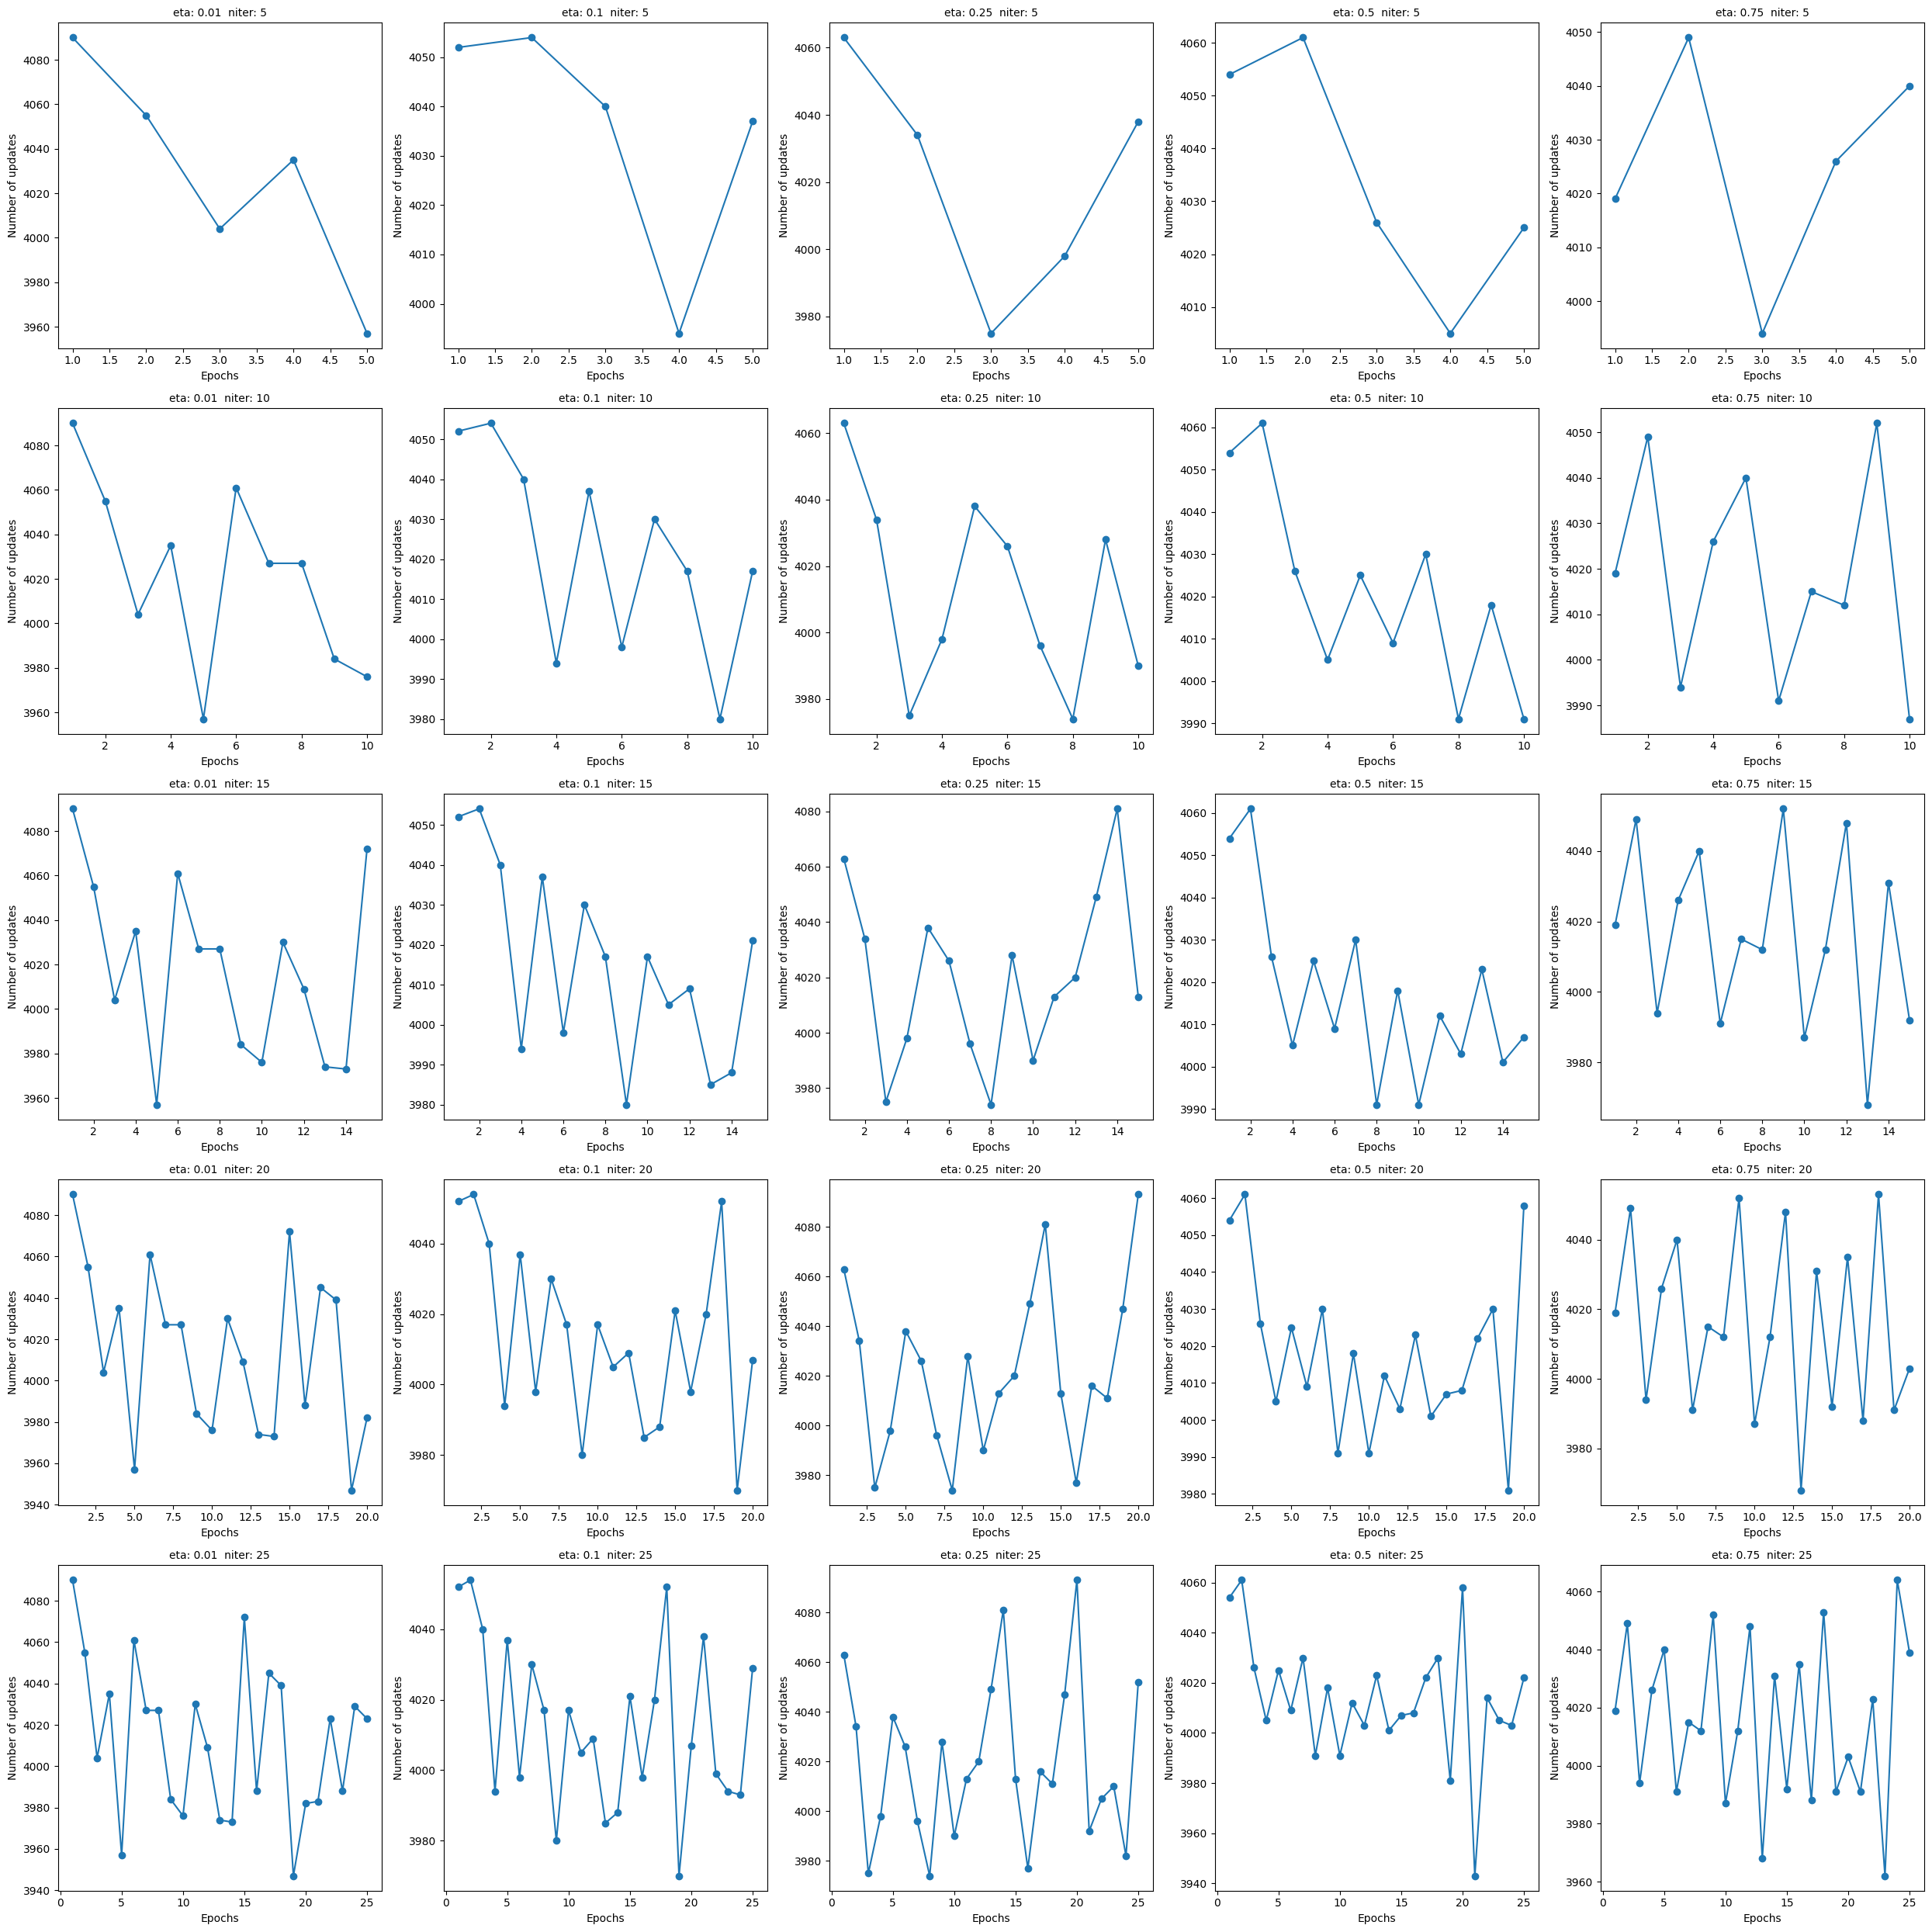

In [ ]:
# Train Perceptron and find good value of eta and n_iter (Also modified from code given in class)
fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(25, 25))

list_eta = [0.01, 0.1, 0.25, 0.5, 0.75]
list_niter = [5, 10, 15, 20, 25]

for j, n_temp in enumerate(list_niter):

    for i, e_temp in enumerate(list_eta):
        # Convert to numpy arrays of correct dtype
        X_np = X_test.values.astype(np.float64)
        y_np = y_test.values.astype(np.int64)
        ppn = Perceptron(n_iter=n_temp, eta=e_temp).fit(X_train.values, y_train.values)
        ax[j, i].plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
        ax[j, i].set_xlabel('Epochs', fontsize=10)
        ax[j, i].set_ylabel('Number of updates', fontsize=10)
        ax[j, i].set_title(f"eta: {e_temp}  niter: {n_temp}", fontsize=10)
        
        y_pred = ppn.predict(X_test.values)
        print(f"Perceptron accuracy with n_iter {n_temp} and eta {e_temp}: {accuracy_score(y_test.values, y_pred):.4f}")
    
plt.tight_layout()
plt.show()

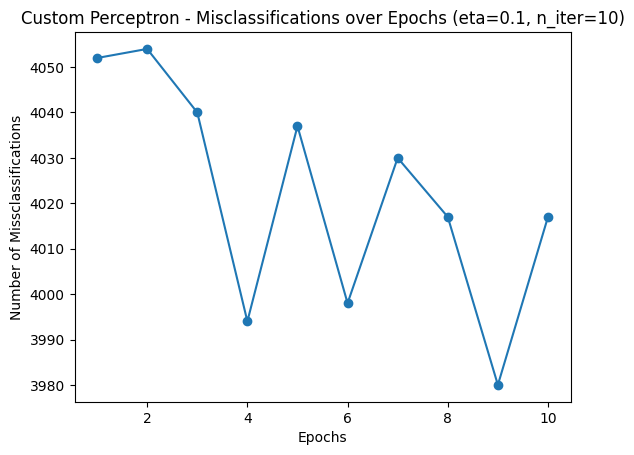

In [ ]:
# Graph only the best model (eta = 0.1, best n_iter = 10)

# Training the perceptron model
ppn_best = Perceptron(eta=0.1, n_iter=10, random_state=42)
ppn_best.fit(X_train.values, y_train.values)



# Plot misclassification error for each epoch
plt.plot(range(1, len(ppn_best.errors_) + 1), ppn_best.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of Missclassifications')
plt.title('Custom Perceptron - Misclassifications over Epochs (eta=0.1, n_iter=10)')

plt.show()

In [ ]:
# Predict the validation dataset using the best custom model
validation_features = validation_df.drop(columns=['income'])
validation_np = validation_features.values.astype(np.float64)
custom_perceptron_validation_predictions = ppn_best.predict(validation_np)
print("Best Perceptron predictions (first 20):\n", custom_perceptron_validation_predictions[:20])

Best Perceptron predictions (first 20):
 [0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0]


In [ ]:
# This is the custom Adaline Class that was given to us in class with small modifications to fit the project requirements.
class AdalineGD:
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    random_state : int
        Random number generator seed for random weight initialization.


    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    b_ : Scalar
        Bias unit after fitting.
    losses_ : list
        Mean squared eror loss function values in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=42):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
            Training vectors, where n_examples is the number of examples and
            n_features is the number of features.
        y : array-like, shape = [n_examples]
            Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float64(0.)
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)          
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)
    
    def accuracy(self, X, y):
        """Return accuracy of the model"""
        predictions = self.predict(X)
        print("Accuracy = ", np.mean(predictions == y))

Adaline accuracy with n_iter 1 and eta 0.1: 0.7649
Adaline accuracy with n_iter 1 and eta 0.01: 0.7589
Adaline accuracy with n_iter 1 and eta 0.001: 0.7589
Adaline accuracy with n_iter 1 and eta 0.0001: 0.7589
Adaline accuracy with n_iter 1 and eta 1e-05: 0.7589
Adaline accuracy with n_iter 5 and eta 0.1: 0.8200
Adaline accuracy with n_iter 5 and eta 0.01: 0.7593
Adaline accuracy with n_iter 5 and eta 0.001: 0.7589
Adaline accuracy with n_iter 5 and eta 0.0001: 0.7589
Adaline accuracy with n_iter 5 and eta 1e-05: 0.7589
Adaline accuracy with n_iter 10 and eta 0.1: 0.8291
Adaline accuracy with n_iter 10 and eta 0.01: 0.7632
Adaline accuracy with n_iter 10 and eta 0.001: 0.7589
Adaline accuracy with n_iter 10 and eta 0.0001: 0.7589
Adaline accuracy with n_iter 10 and eta 1e-05: 0.7589
Adaline accuracy with n_iter 15 and eta 0.1: 0.8309
Adaline accuracy with n_iter 15 and eta 0.01: 0.7645
Adaline accuracy with n_iter 15 and eta 0.001: 0.7589
Adaline accuracy with n_iter 15 and eta 0.0001:

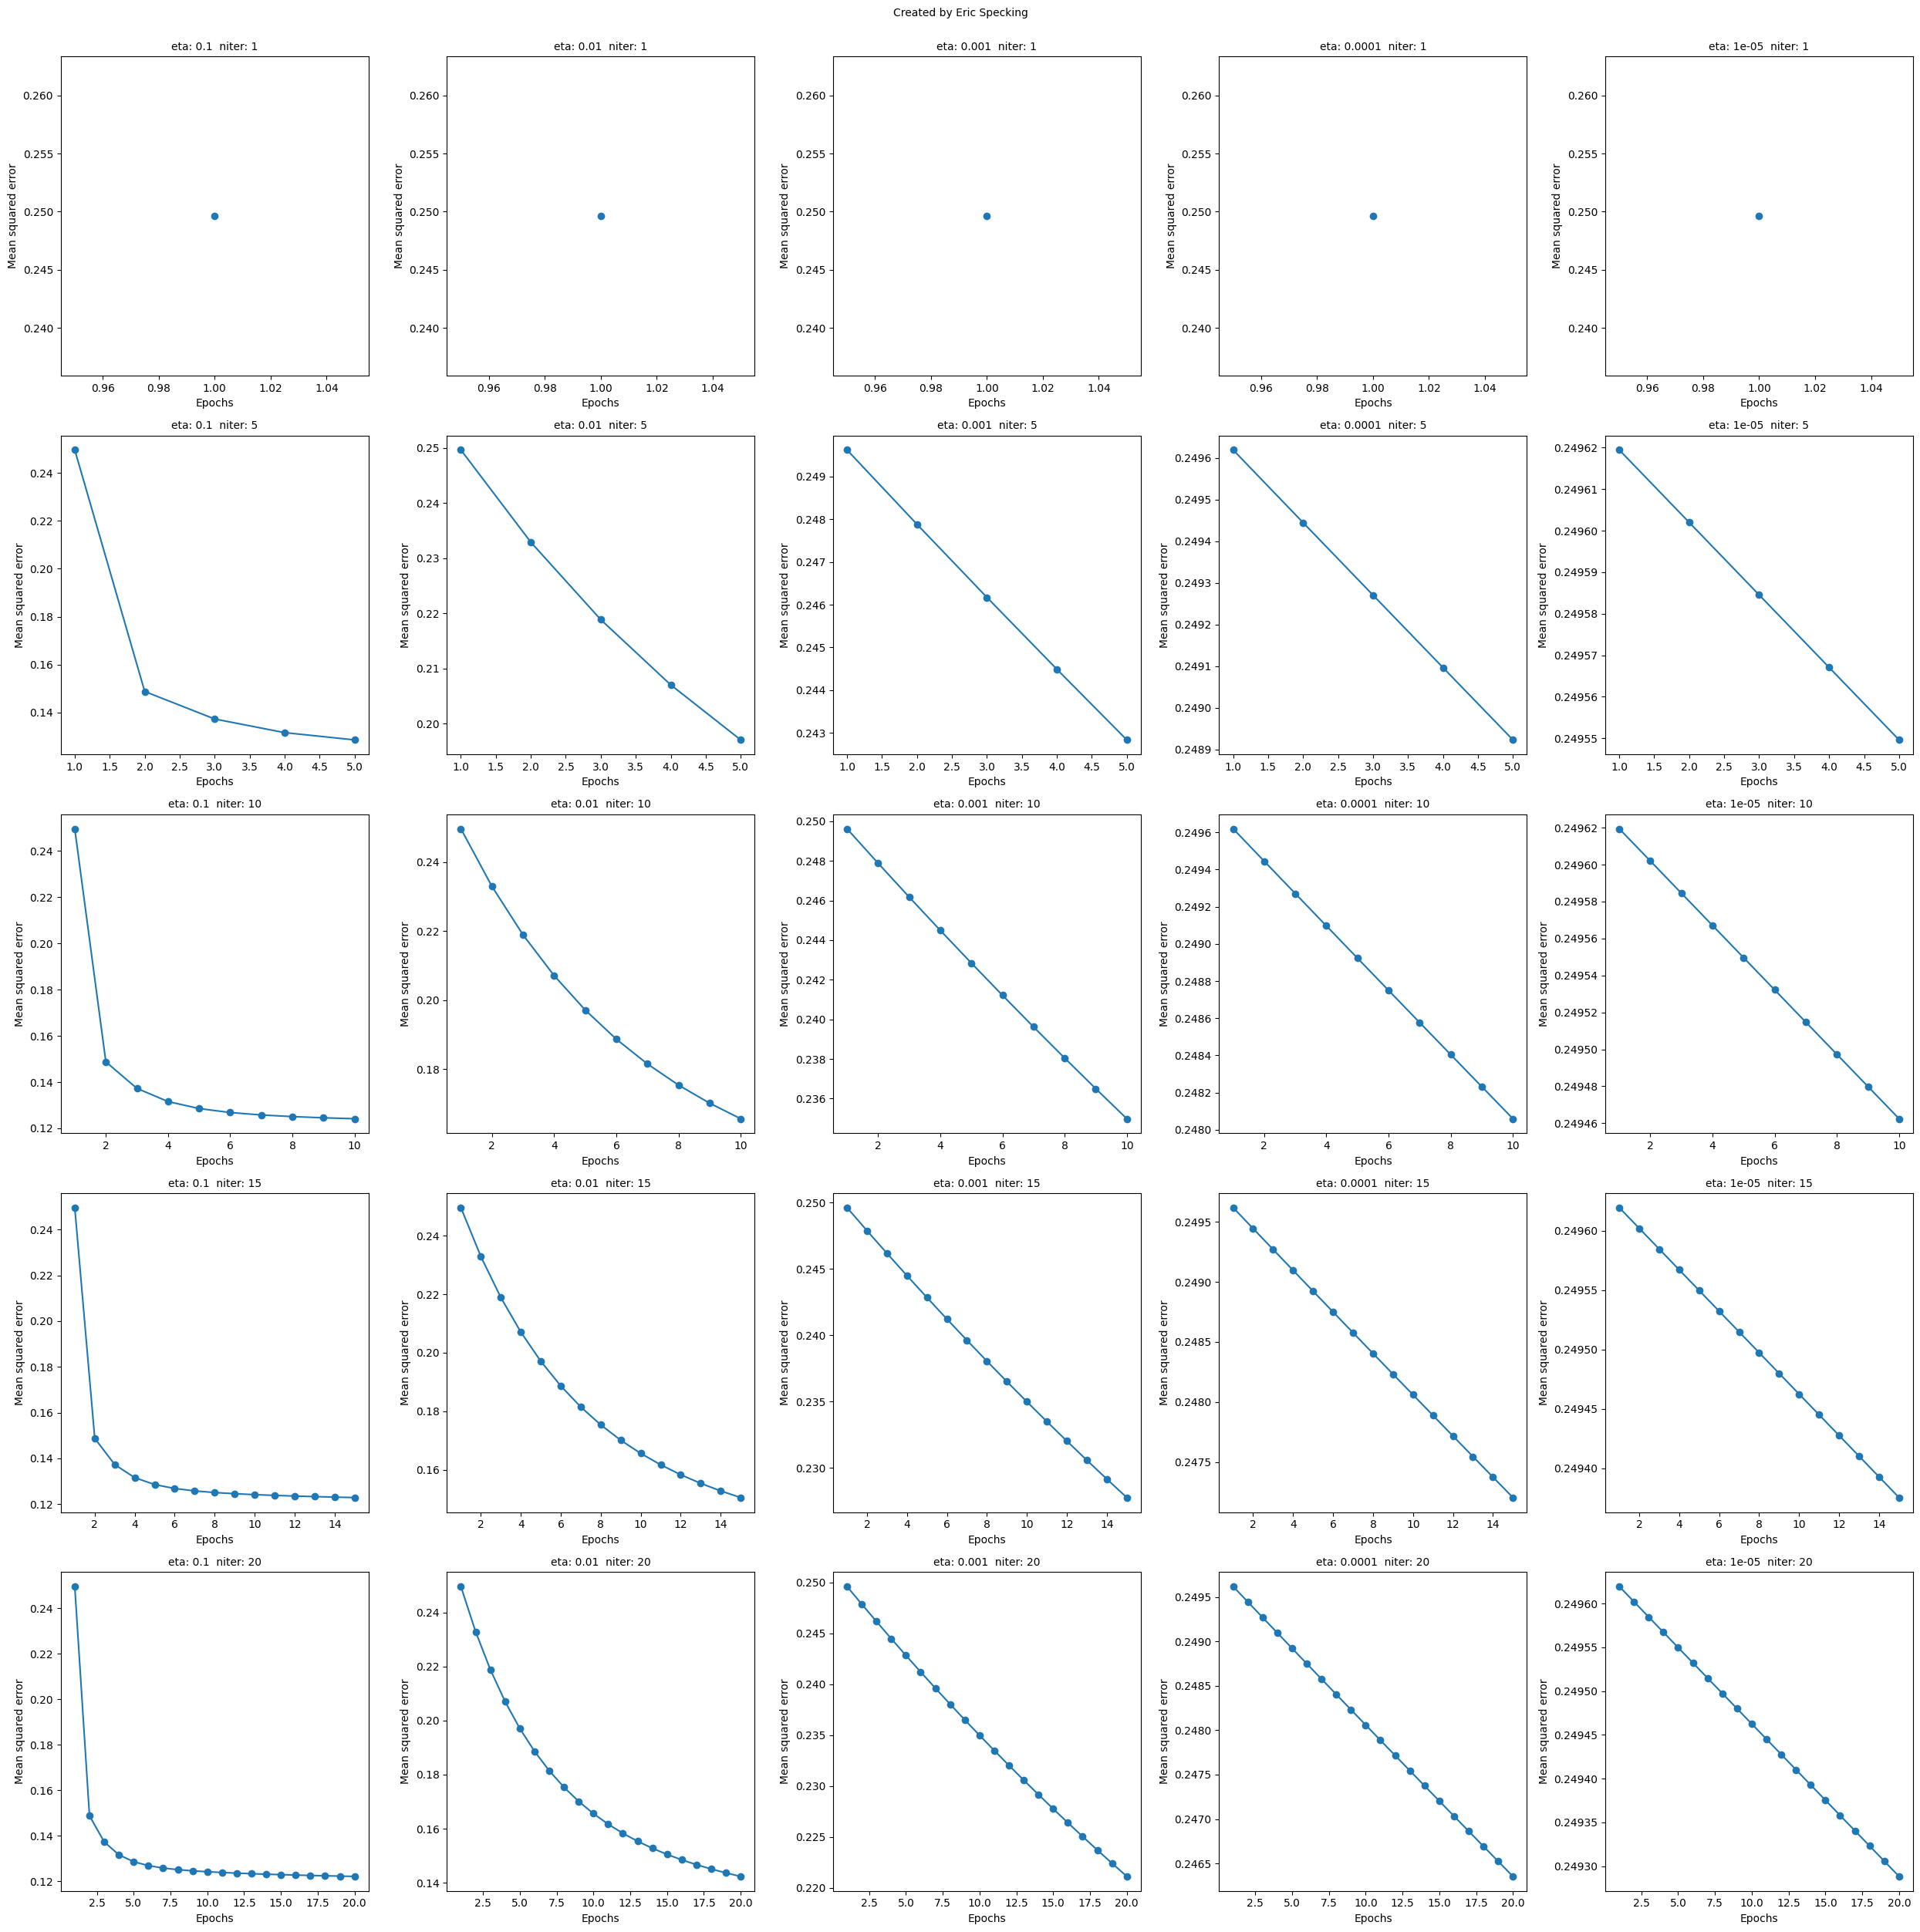

In [ ]:
# looking at parameters eta and n_iter
fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(25, 25))

list_eta = [.1, 0.01, 0.001, 0.0001, 0.00001]
list_niter = [1, 5, 10, 15, 20]

fig.suptitle("Created by Eric Specking", fontsize=10, y=1)

for j, n_temp in enumerate(list_niter):

    for i, e_temp in enumerate(list_eta):
        ada = AdalineGD(n_iter=n_temp, eta= e_temp).fit(X_train.values, y_train.values)
        ax[j, i].plot(range(1, len(ada.losses_) + 1), ada.losses_, marker='o')
        ax[j, i].set_xlabel('Epochs', fontsize=10)
        ax[j, i].set_ylabel('Mean squared error', fontsize=10)
        ax[j, i].set_title(f"eta: {e_temp}  niter: {n_temp}", fontsize=10)

        y_pred = ada.predict(X_test.values)
        print(f"Adaline accuracy with n_iter {n_temp} and eta {e_temp}: {accuracy_score(y_test.values, y_pred):.4f}")
    
plt.tight_layout()
plt.show()

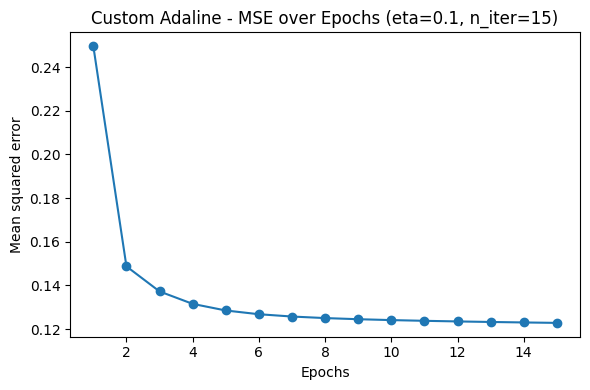

Accuracy =  0.8309188741721855


In [ ]:
# Best AdalineGD model (eta = 0.1, best n_iter = 15)

fig, ax = plt.subplots(1, 1, figsize=(6, 4)) 

ada1 = AdalineGD(n_iter=15, eta=0.1).fit(X_train.values, y_train.values)
ax.plot(range(1, len(ada1.losses_) + 1), ada1.losses_, marker='o')
ax.set_xlabel('Epochs')
ax.set_ylabel('Mean squared error')
ax.set_title('Custom Adaline - MSE over Epochs (eta=0.1, n_iter=15)')

plt.tight_layout()
plt.show()

ada1.accuracy(X_test.values, y_test.values)

In [56]:
# Predict the validation dataset using the best custom model
validation_np = validation_features.values.astype(np.float64)
adaline_validation_predictions = ada1.predict(validation_np)
print("Best Adaline predictions (first 20):\n", adaline_validation_predictions[:20])

Best Adaline predictions (first 20):
 [0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0]


### Scikit Learn Adaline and Perceptron Implementation

/Users/estout/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/estout/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/estout/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/estout/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Best Perceptron params: {'eta0': 0.01, 'max_iter': 15, 'penalty': 'l1'}
Best Perceptron CV accuracy: 0.8054333764553686


/Users/estout/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/estout/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/estout/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/estout/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Best Adaline params: {'alpha': 0.0001, 'eta0': 0.001, 'learning_rate': 'constant', 'max_iter': 500, 'penalty': 'elasticnet'}
Best Adaline CV accuracy: 0.8351358344113843


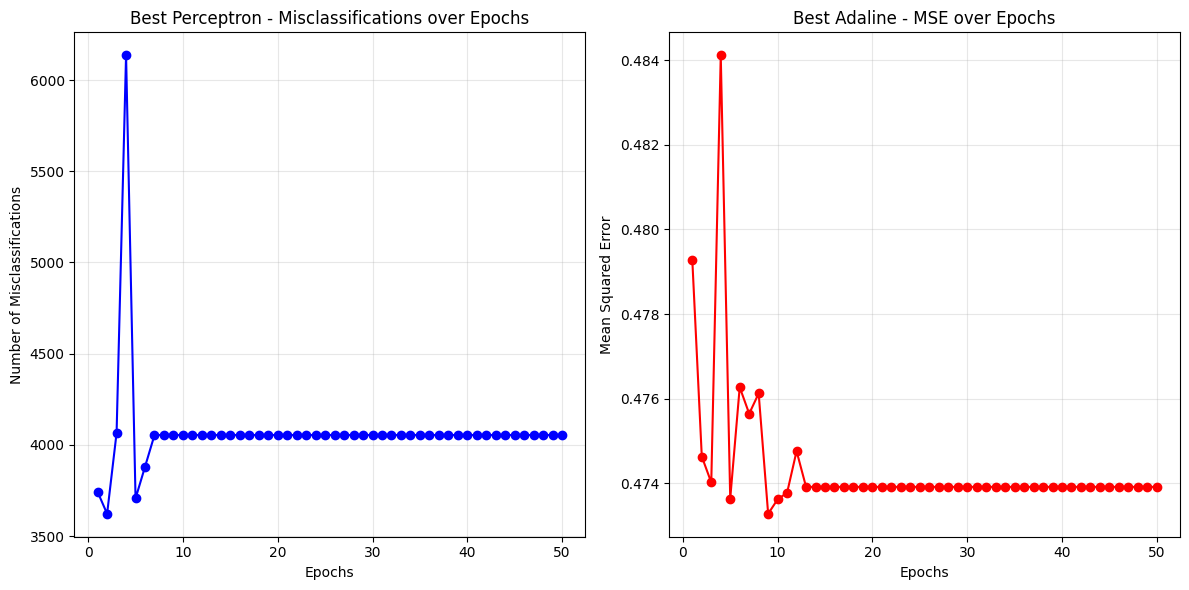

FINAL RESULTS
Perceptron Training Accuracy:  0.7671927554980595
Perceptron Test Accuracy:  0.7742135761589404
Adaline Training Accuracy:  0.8341009055627425
Adaline Test Accuracy:  0.8321605960264901


In [ ]:
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# GridSearchCV for Perceptron
param_grid_ppn = {
    'eta0': [0.001, 0.01, 0.1, 0.5],
    'max_iter': [15, 50, 100, 200],
    'penalty': [None, 'l2', 'l1']
}

grid_ppn = GridSearchCV(
    estimator=Perceptron_sklearn(
        random_state=42,
        early_stopping=True,  # Stop early if no improvement
        validation_fraction=0.1,  # Use 10% for validation
        n_iter_no_change=5  # Stop if no improvement for 5 iterations
    ),
    param_grid=param_grid_ppn,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_ppn.fit(X_train, y_train)
ppn_best = grid_ppn.best_estimator_
print("Best Perceptron params:", grid_ppn.best_params_)
print("Best Perceptron CV accuracy:", grid_ppn.best_score_)



# GridSearchCV for Adaline (SGD with squared loss)
param_grid_ada = {
    'eta0': [0.001, 0.01, 0.1],
    'max_iter': [15, 500, 1000, 2000], 
    'learning_rate': ['constant', 'optimal'],
    'alpha': [0.0001, 0.001, 0.01],
    'penalty': ['l2', 'l1', 'elasticnet']
}

grid_ada = GridSearchCV(
    estimator=SGDClassifier(
        loss='squared_error', 
        random_state=42,
        tol=1e-4,  # Tolerance for stopping criterion
        early_stopping=True,  # Enable early stopping
        validation_fraction=0.1,  # Fraction of training data to set aside for early stopping
        n_iter_no_change=10  # Number of iterations with no improvement to wait before early stopping
    ),
    param_grid=param_grid_ada,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_ada.fit(X_train, y_train)
ada_best = grid_ada.best_estimator_
print("Best Adaline params:", grid_ada.best_params_)
print("Best Adaline CV accuracy:", grid_ada.best_score_)



# Training history for Perceptron (approximation)
def get_perceptron_errors(X_train, y_train, best_params, max_epochs=50):
    """Simulate Perceptron training to get error progression"""
    errors = []
    for epoch in range(1, max_epochs + 1):
        ppn_temp = Perceptron_sklearn(
            eta0=best_params.get('eta0', 1.0),
            penalty=best_params.get('penalty', None),
            alpha=best_params.get('alpha', 0.0001),
            max_iter=epoch,
            random_state=42
        )
        ppn_temp.fit(X_train, y_train)
        y_pred = ppn_temp.predict(X_train)
        error_count = (y_pred != y_train).sum()
        errors.append(error_count)
    return errors

ppn_errors = get_perceptron_errors(X_train, y_train, grid_ppn.best_params_)

#Plot the best model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(ppn_errors) + 1), ppn_errors, marker='o', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Number of Misclassifications')
plt.title('Best Perceptron - Misclassifications over Epochs')
plt.grid(True, alpha=0.3)


# Training history for Adaline (approximation)
def get_adaline_losses(X_train, y_train, best_params, max_epochs=50):
    losses = []
    for epoch in range(1, max_epochs + 1):
        ada_temp = SGDClassifier(
            loss='squared_error',
            eta0=best_params.get('eta0', 0.01),
            learning_rate=best_params.get('learning_rate', 'constant'),
            alpha=best_params.get('alpha', 0.0001),
            penalty=best_params.get('penalty', 'l2'),
            max_iter=epoch,
            random_state=42,
            shuffle=True,
            tol=1e-4,  # Add tolerance
            early_stopping=False,  # Disable for simulation
            warm_start=False  # Don't use warm start for simulation
        )
        ## Dealing with warning messages for convergence issues
        try:
            # Suppress warnings for this simulation
            import warnings
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                ada_temp.fit(X_train, y_train)
                
            # For binary classification, convert predictions to continuous values
            decision_scores = ada_temp.decision_function(X_train)
            # Convert y to {-1, 1} for MSE calculation
            y_binary = np.where(y_train == 0, -1, 1)
            mse = np.mean((y_binary - decision_scores) ** 2)
            losses.append(mse)
        except Exception as e:
            # If convergence fails, use previous loss
            if losses:
                losses.append(losses[-1])
            else:
                losses.append(1.0)  # Default high loss
    return losses

ada_losses = get_adaline_losses(X_train, y_train, grid_ada.best_params_)

#Plot the best model
plt.subplot(1, 2, 2)
plt.plot(range(1, len(ada_losses) + 1), ada_losses, marker='o', color='red')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Best Adaline - MSE over Epochs')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# Compute training and test accuracies
train_acc_ppn = accuracy_score(y_train, ppn_best.predict(X_train))
train_acc_ada = accuracy_score(y_train, ada_best.predict(X_train))
test_acc_ppn = accuracy_score(y_test, ppn_best.predict(X_test))
test_acc_ada = accuracy_score(y_test, ada_best.predict(X_test))


print("FINAL RESULTS")

print("Perceptron Training Accuracy: ", train_acc_ppn)
print("Perceptron Test Accuracy: ", test_acc_ppn)

print("Adaline Training Accuracy: ", train_acc_ada)
print("Adaline Test Accuracy: ", test_acc_ada)

In [58]:
# Ensure validation_df has the same columns as X_train
missing_cols = set(X_train.columns) - set(validation_df.columns)
for col in missing_cols:
    validation_df[col] = 0  # Add missing columns as zeros

# Reorder columns to match training data
validation_df = validation_df[X_train.columns]

# ----------------------------
# Predictions from Best Perceptron
# ----------------------------
perceptron_predictions = ppn_best.predict(validation_df)
perceptron_probabilities = ppn_best.decision_function(validation_df)  # Decision scores

# Map predictions to original labels for printing and CSV
perceptron_labels = pd.Series(perceptron_predictions).map({0: "<=50K", 1: ">50K"}).values

print("Perceptron Predictions:")
print("Best Parameters:", grid_ppn.best_params_)
print("Cross-validation Score:", f"{grid_ppn.best_score_:.4f}")
print("Number of predictions:", len(perceptron_labels))
print("Prediction distribution:")
unique, counts = np.unique(perceptron_labels, return_counts=True)
for val, count in zip(unique, counts):
    print(f"  Class {val}: {count} samples ({count/len(perceptron_labels)*100:.1f}%)")

# === Save Perceptron predictions to CSV with lowercase 'prediction' header ===
pd.DataFrame({"prediction": perceptron_labels}).to_csv(
    "Group_7_Perceptron_PredictedOutputs.csv", index=False
)

# ----------------------------
# Predictions from Best Adaline
# ----------------------------
adaline_predictions = ada_best.predict(validation_df)
adaline_probabilities = ada_best.decision_function(validation_df)  # Decision scores

# Map predictions to original labels for printing and CSV
adaline_labels = pd.Series(adaline_predictions).map({0: "<=50K", 1: ">50K"}).values

print("\nAdaline Predictions:")
print("Best Parameters:", grid_ada.best_params_)
print("Cross-validation Score:", f"{grid_ada.best_score_:.4f}")
print("Number of predictions:", len(adaline_labels))
print("Prediction distribution:")
unique, counts = np.unique(adaline_labels, return_counts=True)
for val, count in zip(unique, counts):
    print(f"  Class {val}: {count} samples ({count/len(adaline_labels)*100:.1f}%)")

# === Save Adaline predictions to CSV with lowercase 'prediction' header ===
pd.DataFrame({"prediction": adaline_labels}).to_csv(
    "Group_7_Adaline_PredictedOutputs.csv", index=False
)

Perceptron Predictions:
Best Parameters: {'eta0': 0.01, 'max_iter': 15, 'penalty': 'l1'}
Cross-validation Score: 0.8054
Number of predictions: 6005
Prediction distribution:
  Class <=50K: 5787 samples (96.4%)
  Class >50K: 218 samples (3.6%)

Adaline Predictions:
Best Parameters: {'alpha': 0.0001, 'eta0': 0.001, 'learning_rate': 'constant', 'max_iter': 500, 'penalty': 'elasticnet'}
Cross-validation Score: 0.8351
Number of predictions: 6005
Prediction distribution:
  Class <=50K: 5105 samples (85.0%)
  Class >50K: 900 samples (15.0%)


### Logistic Regression

In [59]:
# Logistic Regression with StandardScaler preprocessing
num_bool_cols = X_train.select_dtypes(include=["number", "bool"]).columns.tolist()

Xtr_nb = X_train[num_bool_cols].copy()
Xte_nb = X_test[num_bool_cols].copy()

bool_cols = Xtr_nb.select_dtypes(include=["bool"]).columns
if len(bool_cols) > 0:
    Xtr_nb[bool_cols] = Xtr_nb[bool_cols].astype(int)
    Xte_nb[bool_cols] = Xte_nb[bool_cols].astype(int)

scaler_lr = StandardScaler().fit(Xtr_nb)
Xtr_std = scaler_lr.transform(Xtr_nb)
Xte_std = scaler_lr.transform(Xte_nb)

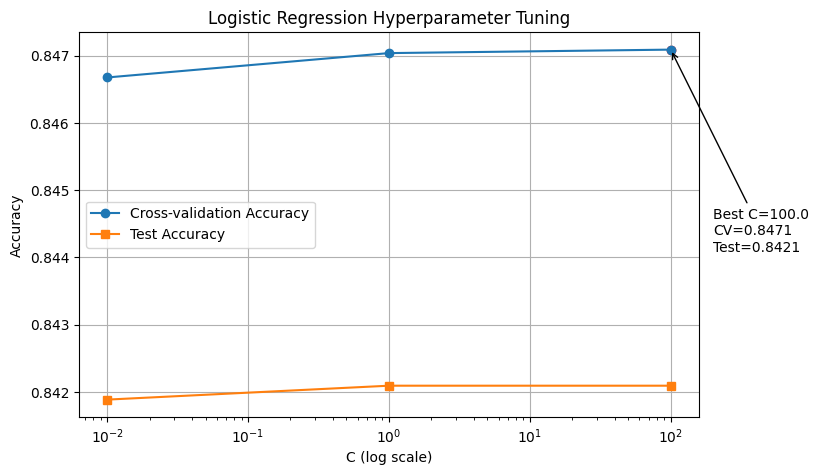

In [83]:
# Values of the regularization strength to try (smaller C = stronger regularization)
Cs = [0.01, 1.0, 100.0]

# We will store the average 5-fold CV accuracy and the hold-out test accuracy for each C
cv_scores = []
test_scores = []

# 5-fold stratified CV (keeps class balance in each fold)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for c in Cs:
    # Define the model with a given C; lbfgs is a good solver for LR on standardized data
    model = LogisticRegression(C=c, max_iter=2000, solver='lbfgs')

    # Cross-validated accuracy on the TRAINING set (fit/eval happens within folds only)
    cv_scores.append(cross_val_score(model, Xtr_std, y_train, cv=skf, scoring='accuracy').mean())

    # Refit the same model on ALL training data and evaluate once on the TEST set
    model.fit(Xtr_std, y_train)
    test_scores.append(accuracy_score(y_test, model.predict(Xte_std)))

# Pick the C that gave the highest mean CV accuracy
best_idx = np.argmax(cv_scores)
best_c = Cs[best_idx]

# Plot CV and Test accuracy vs. C (log scale makes spacing even across orders of magnitude)
plt.figure(figsize=(8,5))
plt.semilogx(Cs, cv_scores, marker='o', label='Cross-validation Accuracy')
plt.semilogx(Cs, test_scores, marker='s', label='Test Accuracy')

# Highlight/annotate the best C found by CV
plt.scatter(best_c, cv_scores[best_idx], color='red')
plt.annotate(
    f'Best C={best_c}\nCV={cv_scores[best_idx]:.4f}\nTest={test_scores[best_idx]:.4f}',
    xy=(best_c, cv_scores[best_idx]),
    xytext=(best_c*2, cv_scores[best_idx] - 0.003),
    arrowprops=dict(arrowstyle='->')
)

# Basic labels and styling
plt.xlabel('C (log scale)')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Hyperparameter Tuning')
plt.legend()
plt.grid(True)
plt.show()

['0', '1']
[[3368  299]
 [ 464  701]]
              precision    recall  f1-score   support

           0     0.8789    0.9185    0.8983      3667
           1     0.7010    0.6017    0.6476      1165

    accuracy                         0.8421      4832
   macro avg     0.7900    0.7601    0.7729      4832
weighted avg     0.8360    0.8421    0.8378      4832



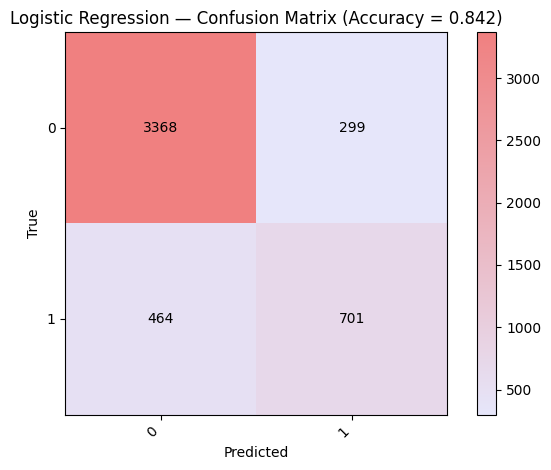

In [79]:
# Ensure best model and test predictions exist
try:
    best_lr
except NameError:
    try:
        best_c
    except NameError:
        best_c = 100.0
    best_lr = LogisticRegression(C=best_c, max_iter=2000, solver='lbfgs').fit(Xtr_std, y_train)

try:
    y_pred_lr_test
except NameError:
    y_pred_lr_test = best_lr.predict(Xte_std)

# Text-based confusion matrix and classification report
y_test_lab = pd.Series(y_test).astype(str).str.strip()
y_pred_lab = pd.Series(y_pred_lr_test).astype(str).str.strip()

labels_all = sorted(pd.unique(pd.concat([y_test_lab, y_pred_lab], ignore_index=True)))
cm_lr = confusion_matrix(y_test_lab, y_pred_lab, labels=labels_all)
print(labels_all)
print(cm_lr)
print(classification_report(y_test_lab, y_pred_lab, labels=labels_all, digits=4))

# Confusion Matrix Heatmap
acc_lr = accuracy_score(y_test_lab, y_pred_lab)
lavender_red = LinearSegmentedColormap.from_list("lavender_red", ["lavender", "lightcoral"])

plt.figure()
plt.imshow(cm_lr, interpolation="nearest", cmap=lavender_red)
plt.title(f"Logistic Regression — Confusion Matrix (Accuracy = {acc_lr:.3f})")
plt.xticks(range(len(labels_all)), labels_all, rotation=45, ha="right")
plt.yticks(range(len(labels_all)), labels_all)
for i in range(cm_lr.shape[0]):
    for j in range(cm_lr.shape[1]):
        plt.text(j, i, cm_lr[i, j], ha="center", va="center")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.colorbar()
plt.tight_layout()
plt.show()

{'pos_label': '1', 'roc_auc': 0.8995}


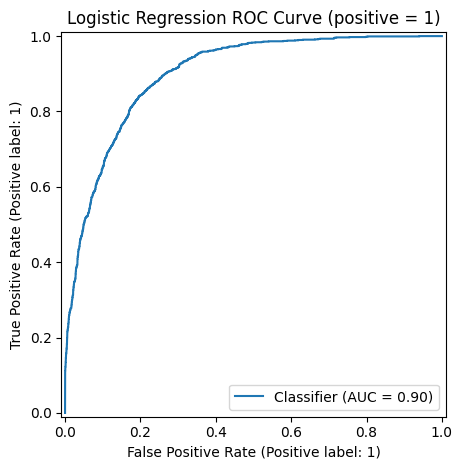

In [81]:
# Ensure best model exists
try:
    best_lr
except NameError:
    try:
        best_c
    except NameError:
        best_c = 100.0
    best_lr = LogisticRegression(C=best_c, max_iter=2000, solver='lbfgs').fit(Xtr_std, y_train)

# ROC Curve and AUC
y_test_lab = pd.Series(y_test).astype(str).str.strip()

classes_ = pd.Series(best_lr.classes_).astype(str).str.strip().tolist()
pos_label = ">50K" if ">50K" in classes_ else classes_[-1]
pos_idx = classes_.index(pos_label)

y_true_bin = (y_test_lab == pos_label).astype(int).to_numpy()
y_score_lr = best_lr.predict_proba(Xte_std)[:, pos_idx]

auc_lr = roc_auc_score(y_true_bin, y_score_lr)
print({"pos_label": pos_label, "roc_auc": round(auc_lr, 4)})

RocCurveDisplay.from_predictions(y_true_bin, y_score_lr)
plt.title(f"Logistic Regression ROC Curve (positive = {pos_label})")
plt.tight_layout()
plt.show()

In [82]:
# Ensure best model exists
try:
    best_lr
except NameError:
    try:
        best_c
    except NameError:
        best_c = 100.0
    best_lr = LogisticRegression(C=best_c, max_iter=2000, solver='lbfgs').fit(Xtr_std, y_train)

# Align validation to training numeric+bool columns
Xval_nb = validation_df.reindex(columns=num_bool_cols, fill_value=float('nan')).copy()

# Cast boolean columns to int
bool_cols_val = Xval_nb.select_dtypes(include=["bool"]).columns
if len(bool_cols_val) > 0:
    Xval_nb[bool_cols_val] = Xval_nb[bool_cols_val].astype(int)

# Fill NaNs with TRAIN medians (no leakage)
meds = Xtr_nb.median(numeric_only=True)
Xval_nb[meds.index] = Xval_nb[meds.index].fillna(meds)

# Scale and predict
Xval_std = scaler_lr.transform(Xval_nb)
val_pred_lr = best_lr.predict(Xval_std)

# Map to original Adult labels if needed and save
pred_series = pd.Series(val_pred_lr, name="prediction").astype(str).str.strip()
pred_series = pred_series.replace({"0": "<=50K", "1": ">50K"})

out_path = "Group_7_LogisticRegression_PredictedOutputs.csv"
pred_series.to_csv(out_path, index=False)

print("Wrote:", out_path)
print("Rows written:", len(pred_series))
print("Unique labels:", sorted(pred_series.unique()))
assert len(pred_series) == len(validation_df), "Mismatch: predictions vs validation rows!"
assert set(pred_series.unique()) <= {"<=50K", ">50K"}, "Predictions must be original labels."

Wrote: Group_7_LogisticRegression_PredictedOutputs.csv
Rows written: 6005
Unique labels: ['<=50K', '>50K']


### SVM

In [66]:
# SVM with StandardScaler preprocessing and StratifiedKFold CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Numeric and Boolean only
num_bool_cols_svm = X_train.select_dtypes(include=["number", "bool"]).columns.tolist()

Xtr_svm_nb = X_train[num_bool_cols_svm].copy()
Xte_svm_nb = X_test[num_bool_cols_svm].copy()

# bool to int
bcols = Xtr_svm_nb.select_dtypes(include=["bool"]).columns
if len(bcols) > 0:
    Xtr_svm_nb[bcols] = Xtr_svm_nb[bcols].astype(int)
    Xte_svm_nb[bcols] = Xte_svm_nb[bcols].astype(int)

# fill NaNs using training medians
svm_meds = Xtr_svm_nb.median(numeric_only=True)
Xtr_svm_nb[svm_meds.index] = Xtr_svm_nb[svm_meds.index].fillna(svm_meds)
Xte_svm_nb[svm_meds.index] = Xte_svm_nb[svm_meds.index].fillna(svm_meds)

# scale
scaler_svm = StandardScaler().fit(Xtr_svm_nb)
Xtr_svm = scaler_svm.transform(Xtr_svm_nb)
Xte_svm = scaler_svm.transform(Xte_svm_nb)

In [67]:
# SVC model - using linear kernel only for speed and compliance
svm = SVC(kernel="linear", probability=False, cache_size=2000, random_state=42)

param_grid_svm = {"C": [0.01, 1.0, 100.0]}

gs_svm = GridSearchCV(svm, param_grid_svm, cv=cv, scoring="accuracy")
gs_svm.fit(Xtr_svm, y_train)

svm_best = gs_svm.best_estimator_
svm_best_params = gs_svm.best_params_

y_pred_svm_test = svm_best.predict(Xte_svm)
svm_cv_acc = gs_svm.best_score_
svm_test_acc = accuracy_score(y_test, y_pred_svm_test)

print({"best_params": svm_best_params, "cv_acc": round(svm_cv_acc, 4), "test_acc": round(svm_test_acc, 4)})

{'best_params': {'C': 0.01}, 'cv_acc': 0.8466, 'test_acc': 0.84}


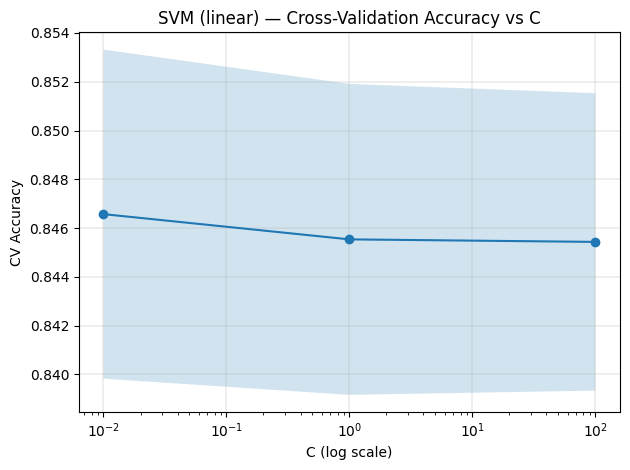

In [68]:
# Plotting CV accuracy vs C for SVM
cvres = gs_svm.cv_results_
Cs = np.array([p["C"] for p in cvres["params"]], dtype=float)
means = cvres["mean_test_score"]
stds = cvres["std_test_score"]

# Sort by C values for plotting
order = np.argsort(Cs)
Cs_s, means_s, stds_s = Cs[order], means[order], stds[order]

plt.figure()
plt.semilogx(Cs_s, means_s, marker="o")
plt.fill_between(Cs_s, means_s - stds_s, means_s + stds_s, alpha=0.2)
plt.xlabel("C (log scale)")
plt.ylabel("CV Accuracy")
plt.title("SVM (linear) — Cross-Validation Accuracy vs C")
plt.grid(True, linewidth=0.3)
plt.tight_layout()
plt.show()

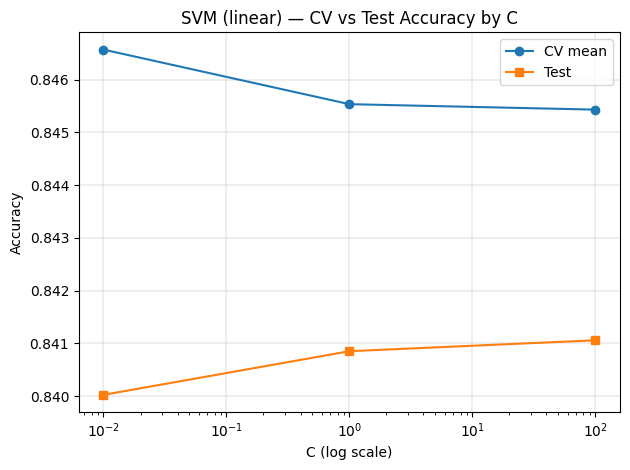

In [69]:
# Compare CV accuracy vs Test accuracy for SVM
test_scores = []
# Re-evaluate test accuracy for each C value
for c in Cs_s:
    m = clone(gs_svm.estimator).set_params(C=float(c))
    m.fit(Xtr_svm, y_train)
    test_scores.append(accuracy_score(y_test, m.predict(Xte_svm)))

plt.figure()
plt.semilogx(Cs_s, means_s, marker="o", label="CV mean")
plt.semilogx(Cs_s, test_scores, marker="s", label="Test")
plt.xlabel("C (log scale)")
plt.ylabel("Accuracy")
plt.title("SVM (linear) — CV vs Test Accuracy by C")
plt.legend()
plt.grid(True, linewidth=0.3)
plt.tight_layout()
plt.show()

In [70]:
# Text-based confusion matrix and classification report for SVM
y_test_lab = pd.Series(y_test).astype(str).str.strip()
y_pred_lab = pd.Series(y_pred_svm_test).astype(str).str.strip()
labels_all = sorted(pd.unique(pd.concat([y_test_lab, y_pred_lab], ignore_index=True)))

cm_svm = confusion_matrix(y_test_lab, y_pred_lab, labels=labels_all)
print(labels_all)
print(cm_svm)
print(classification_report(y_test_lab, y_pred_lab, labels=labels_all, digits=4))

['0', '1']
[[3398  269]
 [ 504  661]]
              precision    recall  f1-score   support

           0     0.8708    0.9266    0.8979      3667
           1     0.7108    0.5674    0.6310      1165

    accuracy                         0.8400      4832
   macro avg     0.7908    0.7470    0.7644      4832
weighted avg     0.8322    0.8400    0.8335      4832



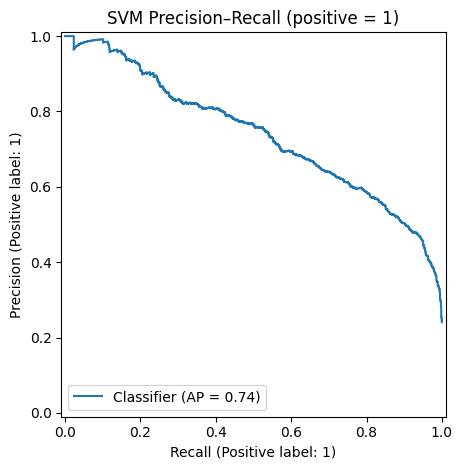

In [71]:
# Precision Recall Curve for SVM
classes_ = pd.Series(svm_best.classes_).astype(str).str.strip().tolist()
pos_label = ">50K" if ">50K" in classes_ else classes_[-1]


y_true_bin = (pd.Series(y_test).astype(str).str.strip() == pos_label).astype(int).to_numpy()
scores = svm_best.decision_function(Xte_svm)

PrecisionRecallDisplay.from_predictions(y_true_bin, scores)
plt.title(f"SVM Precision–Recall (positive = {pos_label})")
plt.tight_layout()
plt.show()

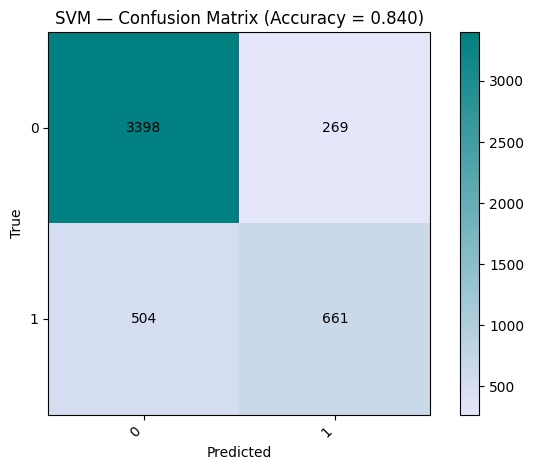

In [72]:
# Prepare labels
y_test_lab = pd.Series(y_test).astype(str).str.strip()
y_pred_lab = pd.Series(y_pred_svm_test).astype(str).str.strip()
labels_all = sorted(pd.unique(pd.concat([y_test_lab, y_pred_lab], ignore_index=True)))

cm = confusion_matrix(y_test_lab, y_pred_lab, labels=labels_all)
acc = accuracy_score(y_test_lab, y_pred_lab)

# Custom lavender to light red colormap
lavender_red = LinearSegmentedColormap.from_list(
    "lavender_teal", ["lavender", "teal"]
)

plt.figure()
plt.imshow(cm, interpolation="nearest", cmap=lavender_red)
plt.title(f"SVM — Confusion Matrix (Accuracy = {acc:.3f})")
plt.xticks(range(len(labels_all)), labels_all, rotation=45, ha="right")
plt.yticks(range(len(labels_all)), labels_all)

# add counts
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.xlabel("Predicted")
plt.ylabel("True")
plt.colorbar()
plt.tight_layout()
plt.show()

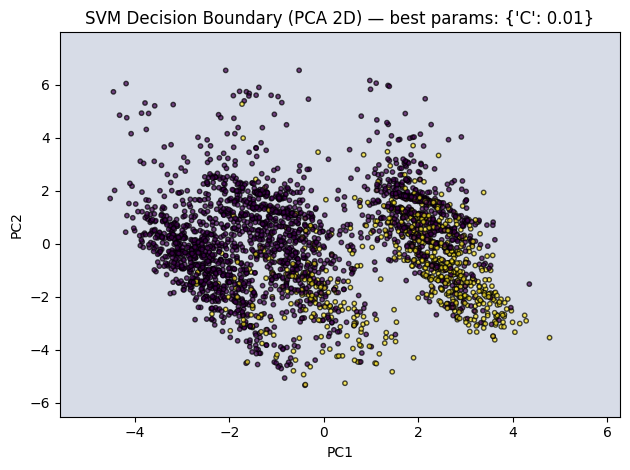

In [73]:
# Decision boundary plot
pca = PCA(n_components=2, random_state=42)
Xtr_pca = pca.fit_transform(Xtr_svm)
Xte_pca = pca.transform(Xte_svm)

svm_pca = SVC(**svm_best.get_params())  # same hyperparams as best model
svm_pca.fit(Xtr_pca, y_train)

x_min, x_max = Xtr_pca[:,0].min() - 1, Xtr_pca[:,0].max() + 1
y_min, y_max = Xtr_pca[:,1].min() - 1, Xtr_pca[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
Z = svm_pca.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, (Z == pos_label).astype(int), alpha=0.2)
idx = np.random.RandomState(42).choice(len(Xtr_pca), size=min(3000, len(Xtr_pca)), replace=False)
plt.scatter(Xtr_pca[idx,0], Xtr_pca[idx,1],
            c=(pd.Series(y_train).iloc[idx].astype(str).str.strip() == pos_label).astype(int),
            edgecolor="k", s=10, alpha=0.7)
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.title(f"SVM Decision Boundary (PCA 2D) — best params: {svm_best_params}")
plt.tight_layout()
plt.show()

In [74]:
# Best-pair search using feature screening + 3-fold CV

# Select numeric + bool columns (same as earlier SVM setup)
num_bool_cols_svm = X_train.select_dtypes(include=["number", "bool"]).columns.tolist()
Xnb = X_train[num_bool_cols_svm].copy()
y = y_train.copy()

# Cast bool to int
bcols = Xnb.select_dtypes(include=["bool"]).columns
if len(bcols) > 0:
    Xnb[bcols] = Xnb[bcols].astype(int)

# Impute training medians
meds_screen = Xnb.median(numeric_only=True)
Xnb = Xnb.fillna(meds_screen)

# Fast univariate screening: keep top-k features
k_top = min(8, Xnb.shape[1])  # keep up to 8 numeric/bool features
mi = mutual_info_classif(Xnb.values, pd.Series(y).astype(str).values, random_state=42)
mi_series = pd.Series(mi, index=Xnb.columns).sort_values(ascending=False)
top_feats = mi_series.index[:k_top].tolist()
print({"top_features_for_pair_search": top_feats})

# Try all pairs among the top-k features with quick 3-fold CV using LinearSVC
best_pair = None
best_pair_cv = -np.inf

pairs_to_try = [(top_feats[i], top_feats[j]) for i in range(len(top_feats)) for j in range(i+1, len(top_feats))]

for c1, c2 in pairs_to_try:
    Xp = X_train[[c1, c2]].copy()
    yp = y_train.copy()

    # drop rows with NaN in pair
    mask = ~Xp.isna().any(axis=1)
    Xp, yp = Xp.loc[mask], yp.loc[mask]

    # bool -> int
    for bc in Xp.select_dtypes(include=["bool"]).columns:
        Xp[bc] = Xp[bc].astype(int)

    # Fit medians on train fold each time (approximate: use global medians for speed)
    m = Xp.median(numeric_only=True)
    Xp = Xp.fillna(m)

    # Scale
    sc = StandardScaler().fit(Xp)
    Xp_std = sc.transform(Xp)

    # Linear SVM
    clf = LinearSVC(dual=False, random_state=42, max_iter=5000, C=svm_best.C if hasattr(svm_best, "C") else 1.0)

    scores = cross_val_score(clf, Xp_std, yp, cv=3, scoring="accuracy", n_jobs=-1)
    mean_score = float(np.mean(scores))

    if mean_score > best_pair_cv:
        best_pair_cv = mean_score
        best_pair = (c1, c2)

print({"best_pair": best_pair, "pair_cv_acc_3fold": round(best_pair_cv, 4)})

{'top_features_for_pair_search': ['marital-status_Married-civ-spouse', 'capital-gain', 'relationship_Husband', 'education-num', 'age', 'marital-status_Never-married', 'capital-loss', 'hours-per-week']}
{'best_pair': ('marital-status_Married-civ-spouse', 'education-num'), 'pair_cv_acc_3fold': 0.814}


{'best_pair': ('marital-status_Married-civ-spouse', 'education-num'), 'pair_cv_acc_3fold': 0.814}


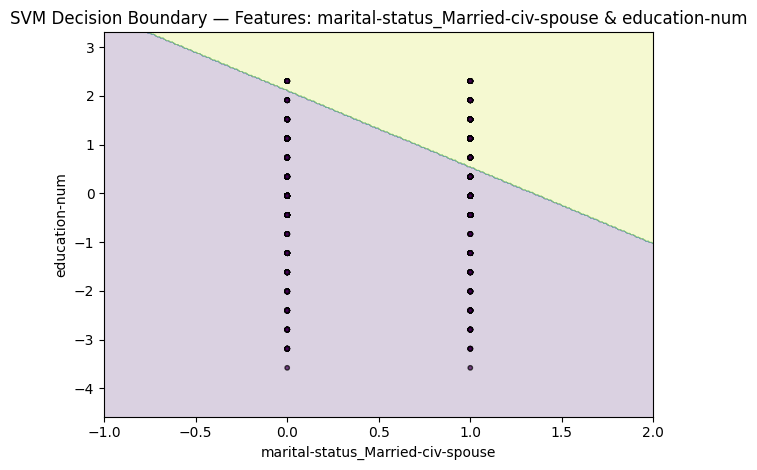

In [75]:
# SVM — Best 2-feature pair search and decision boundary

# Use numeric+bool columns - same as SVM training
num_bool_cols_svm = X_train.select_dtypes(include=["number","bool"]).columns.tolist()
Xnb = X_train[num_bool_cols_svm].copy()
y = y_train.copy()

# Bool to int
bcols = Xnb.select_dtypes(include=["bool"]).columns
if len(bcols) > 0:
    Xnb[bcols] = Xnb[bcols].astype(int)

# Fill NaNs with training medians for screening
meds_screen = Xnb.median(numeric_only=True)
Xnb = Xnb.fillna(meds_screen)

# Screen: top 8 features by mutual information
k_top = min(8, Xnb.shape[1])
mi = mutual_info_classif(Xnb.values, pd.Series(y).astype(str).values, random_state=42)
top_feats = pd.Series(mi, index=Xnb.columns).sort_values(ascending=False).index[:k_top].tolist()

# Try all pairs among the top-k features with quick 3-fold CV using LinearSVC
best_pair, best_cv = None, -np.inf
for c1, c2 in itertools.combinations(top_feats, 2):
    Xp = X_train[[c1, c2]].copy()
    yp = y_train.copy()
    mask = ~Xp.isna().any(axis=1)
    Xp, yp = Xp.loc[mask], yp.loc[mask]
    for bc in Xp.select_dtypes(include=["bool"]).columns:
        Xp[bc] = Xp[bc].astype(int)
    m = Xp.median(numeric_only=True)
    Xp = Xp.fillna(m)
    sc = StandardScaler().fit(Xp)
    Xp_std = sc.transform(Xp)
    clf = LinearSVC(dual=False, random_state=42, max_iter=5000, C=getattr(svm_best, "C", 1.0))
    score = cross_val_score(clf, Xp_std, yp, cv=3, scoring="accuracy", n_jobs=-1).mean()
    if score > best_cv:
        best_cv, best_pair, best_meds, best_scaler = score, (c1, c2), m, sc

print({"best_pair": best_pair, "pair_cv_acc_3fold": round(best_cv, 4)})

# Fit SVC with your tuned params on the best 2D pair and plot boundary
Xp = X_train[list(best_pair)].copy()
yp = y_train.copy()
mask = ~Xp.isna().any(axis=1)
Xp, yp = Xp.loc[mask], yp.loc[mask]
for bc in Xp.select_dtypes(include=["bool"]).columns:
    Xp[bc] = Xp[bc].astype(int)
Xp = Xp.fillna(best_meds)
Xp_std = best_scaler.transform(Xp)

# Fit SVC
clf2d = SVC(kernel="linear", C=getattr(svm_best, "C", 1.0), random_state=42)
clf2d.fit(Xp_std, yp)

# Decision boundary plot
x_min, x_max = Xp.iloc[:,0].min() - 1, Xp.iloc[:,0].max() + 1
y_min, y_max = Xp.iloc[:,1].min() - 1, Xp.iloc[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
grid = pd.DataFrame({best_pair[0]: xx.ravel(), best_pair[1]: yy.ravel()}).fillna(best_meds)
Z = clf2d.predict(best_scaler.transform(grid)).reshape(xx.shape)

pos_label = ">50K" if ">50K" in pd.Series(clf2d.classes_).astype(str).tolist() else clf2d.classes_[-1]

plt.figure()
plt.contourf(xx, yy, (Z == pos_label).astype(int), alpha=0.2)
idx = np.random.RandomState(42).choice(len(Xp), size=min(3000, len(Xp)), replace=False)
plt.scatter(Xp.iloc[idx,0], Xp.iloc[idx,1],
            c=(pd.Series(yp).iloc[idx].astype(str).str.strip() == pos_label).astype(int),
            edgecolor="k", s=10, alpha=0.7)
plt.xlabel(best_pair[0]); plt.ylabel(best_pair[1])
plt.title(f"SVM Decision Boundary — Features: {best_pair[0]} & {best_pair[1]}")
plt.tight_layout()
plt.show()

In [76]:
# SVM — write Group_7_SVM_PredictedOutputs.csv with original labels (<=50K, >50K)
def to_income_labels(pred):
    s = pd.Series(pred, dtype="object").astype(str).str.strip()
    # already correct?
    if set(s.unique()) <= {"<=50K", ">50K"}:
        return s
    # try numeric mappings
    sn = pd.to_numeric(s, errors="coerce")
    if sn.notna().all():
        uniq = set(sn.unique())
        if uniq <= {0, 1}:
            return sn.map({0: "<=50K", 1: ">50K"})
        if uniq <= {-1, 1}:
            return sn.map({-1: "<=50K", 1: ">50K"})
    # common string variants
    return s.replace({"<=50K.": "<=50K", ">50K.": ">50K", "0": "<=50K", "1": ">50K", "-1": "<=50K"})

# 1) Build validation matrix aligned to SVM train features (no row dropping)
Xval_svm_nb = validation_df.reindex(columns=num_bool_cols_svm, fill_value=np.nan).copy()

# 2) Cast booleans to int for consistency
bcols_val = Xval_svm_nb.select_dtypes(include=["bool"]).columns
if len(bcols_val) > 0:
    Xval_svm_nb[bcols_val] = Xval_svm_nb[bcols_val].astype(int)

# 3) Fill NaNs with TRAIN medians used in SVM prep (no leakage)
Xval_svm_nb[svm_meds.index] = Xval_svm_nb[svm_meds.index].fillna(svm_meds)

# 4) Scale with TRAIN scaler and predict
Xval_svm = scaler_svm.transform(Xval_svm_nb)
svm_val_pred_raw = svm_best.predict(Xval_svm)

# 5) Force original labels & save to current folder
svm_val_pred = to_income_labels(svm_val_pred_raw).rename("prediction")
out_path = Path("./Group_7_SVM_PredictedOutputs.csv")
svm_val_pred.to_csv(out_path, index=False)

# 6) Verify
print("Wrote:", out_path)
print("Rows written:", len(svm_val_pred), "| expected:", len(validation_df))
print("Unique labels:", sorted(pd.Series(svm_val_pred).unique()))
assert len(svm_val_pred) == len(validation_df), "Mismatch: predictions vs validation rows."
assert set(svm_val_pred.unique()) <= {"<=50K", ">50K"}, "Predictions must be the original labels."

Wrote: Group_7_SVM_PredictedOutputs.csv
Rows written: 6005 | expected: 6005
Unique labels: ['<=50K', '>50K']
